# EDA para documentos en el reconomiento de variables para automatización


## 1. Preparación

### 1.1. Instalación de dependencias

In [13]:
%pip install PyPDF2
%pip install pandas
%pip install seaborn
%pip install WordCloud
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


### 1.2. Importación de librerias

In [26]:
import PyPDF2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

### 1.3. Extracción de datos PDFs a Dataframe

In [15]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

In [16]:
# Directorio con tus PDFs
pdf_folder = "datos"
data = []

for filename in os.listdir(pdf_folder):
    if filename.lower().endswith('.pdf'):
        file_path = os.path.join(pdf_folder, filename)
        text = extract_text_from_pdf(file_path)
        # Aquí podrías aplicar algún procesamiento adicional para extraer campos específicos usando regex, NLP, etc.
        data.append({
            "filename": filename,
            "text": text,
            "num_caracteres": len(text)
        })

# Convertir la lista de diccionarios a DataFrame
df = pd.DataFrame(data)
print(df.head())


                                            filename  \
0  0035_FNA_FSW_011_2024_Técnico.NetMobile_WI_202...   
1     0080_FNA_ FSW_011_2024_ BolsaHoras firmada.pdf   
2  0083_FNA_FSW_011_2024_156900_FacturaciónElect...   
3  0084_ FNA_FSW_011_2024_ResumenActa_Horas_Extra...   
4  0085_FNA_FSW_011_2024_Soporte_StandBy_31122024...   

                                                text  num_caracteres  
0   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-\...            8071  
1   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...           12038  
2   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            9471  
3   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            6861  
4   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            8791  


## 2. Aplicación del EDA


### 2.1. Análisis general del dataframe

In [17]:
# Información básica
print(df.info())

# Estadísticas descriptivas (en este caso, por ejemplo, la longitud del texto)
print(df['num_caracteres'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename        7 non-null      object
 1   text            7 non-null      object
 2   num_caracteres  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes
None
count        7.000000
mean     10850.857143
std       4806.732481
min       6861.000000
25%       8431.000000
50%       9471.000000
75%      10812.000000
max      21138.000000
Name: num_caracteres, dtype: float64


### 2.2. Detección de Valores Faltantes

filename          0
text              0
num_caracteres    0
dtype: int64


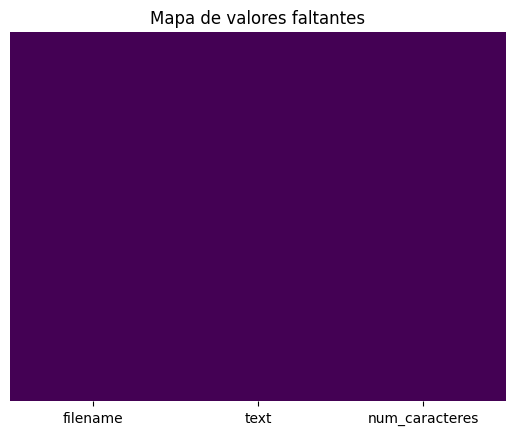

In [18]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Visualización de valores faltantes (opcional, con seaborn o matplotlib)

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores faltantes")
plt.show()


### 2.3. Análisis de Distribuciones

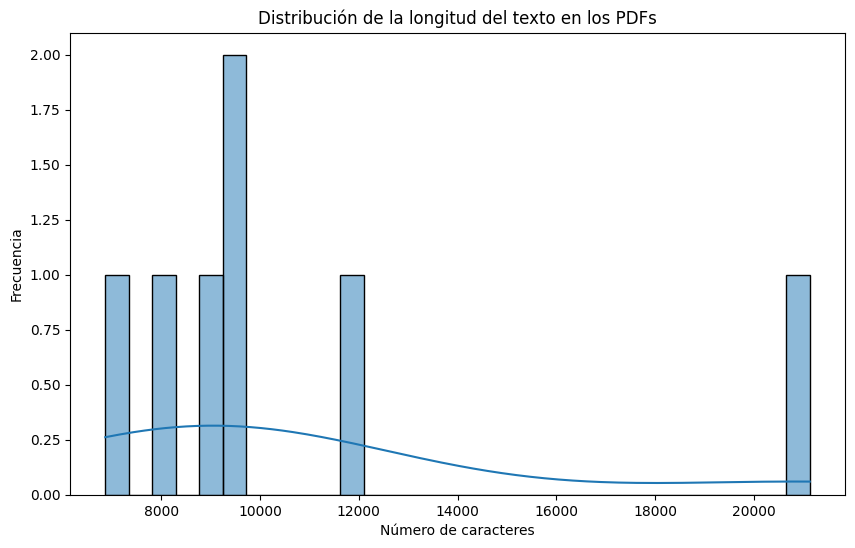

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_caracteres'], bins=30, kde=True)
plt.title("Distribución de la longitud del texto en los PDFs")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()


### 2.4. Análisis de Contenido

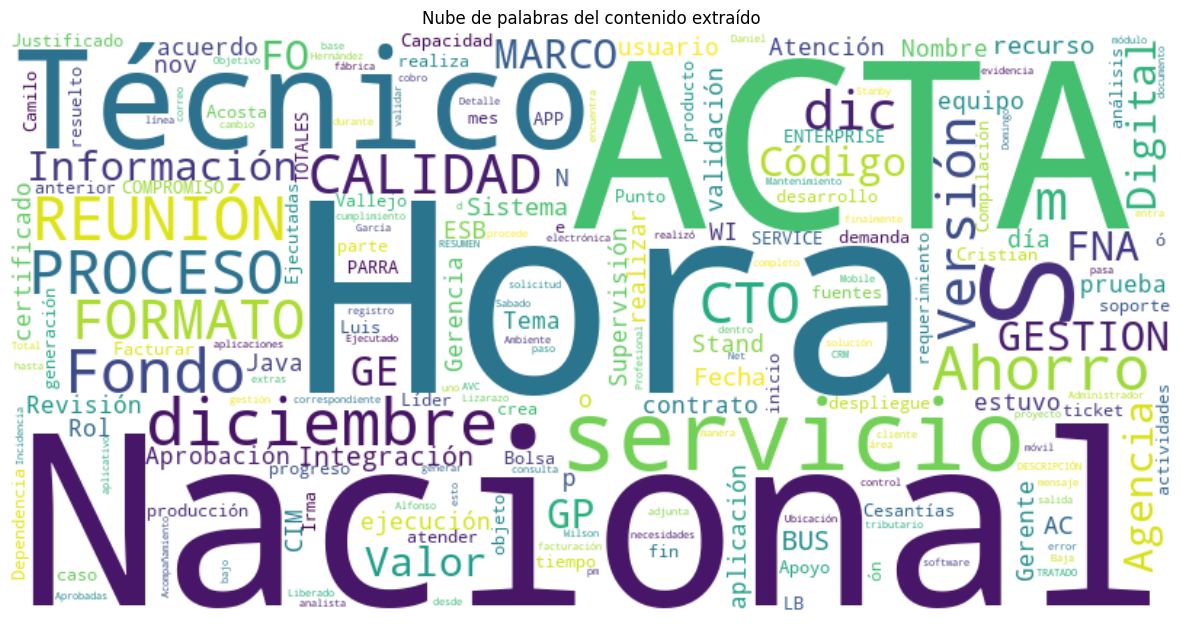

In [20]:
# Definir stopwords en español adicionales
spanish_stopwords = set(STOPWORDS)
# Añadir algunos artículos y otras palabras comunes en español
spanish_stopwords.update([
    "el", "la", "los", "las", "de", "del", "al", "a", "en", "y", "que", "un", "una", "unos", "unas",
    "por", "con", "para", "como", "es", "se", "no", "su", "lo", "más", "pero", "sus", "le", "ha", "me",
    "si", "sin", "sobre", "este", "ya", "entre", "cuando", "todo", "esta", "ser", "son", "dos"
])

# Unir todos los textos extraídos para generar una nube de palabras
all_text = " ".join(df['text'].tolist())

wordcloud = WordCloud(
    width=800,
    height=400, 
    stopwords=spanish_stopwords,
    background_color='white',
    collocations=False 
    ).generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras del contenido extraído")
plt.show()


## 3. Ingeniería de caracteristicas

### 3.1. Generación de Características Basadas en Texto

In [22]:
tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(spanish_stopwords),  # Conversión a lista
    max_df=0.85,                         # Ignorar términos muy frecuentes
    min_df=2                             # Considerar solo términos que aparezcan en al menos 2 documentos
)

# Transformar la columna 'text' en una matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
print("\nDimensión de la matriz TF-IDF:", tfidf_matrix.shape)


Dimensión de la matriz TF-IDF: (7, 538)


c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [30]:
# ==========================================================
# 4. (Opcional) Reducción de Dimensionalidad con PCA
# ==========================================================

# Determinar el número máximo de componentes que se pueden extraer
# Esto es el mínimo entre el número de muestras y el número de características
max_componentes = min(tfidf_matrix.shape[0], tfidf_matrix.shape[1])

# Si deseas usar hasta 100 componentes y están disponibles, de lo contrario usa el máximo posible
n_componentes = 100 if max_componentes >= 100 else max_componentes

from sklearn.decomposition import PCA
pca = PCA(n_components=n_componentes, random_state=42)

# Convertir la matriz dispersa a array y aplicar PCA
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
print("Dimensión de la matriz TF-IDF después de PCA:", tfidf_pca.shape)

# Crear un DataFrame con las componentes principales
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=[f'pca_{i+1}' for i in range(n_componentes)])


Dimensión de la matriz TF-IDF después de PCA: (7, 7)


In [31]:
# ==========================================================
# 5. Integración de Todas las Características
# ==========================================================

# Combinar el DataFrame original con las nuevas variables y las componentes principales del TF-IDF
df_features = pd.concat([df.reset_index(drop=True), tfidf_pca_df.reset_index(drop=True)], axis=1)
print("\nDataFrame final con características de ingeniería:")
print(df_features.head())


DataFrame final con características de ingeniería:
                                            filename  \
0  0035_FNA_FSW_011_2024_Técnico.NetMobile_WI_202...   
1     0080_FNA_ FSW_011_2024_ BolsaHoras firmada.pdf   
2  0083_FNA_FSW_011_2024_156900_FacturaciónElect...   
3  0084_ FNA_FSW_011_2024_ResumenActa_Horas_Extra...   
4  0085_FNA_FSW_011_2024_Soporte_StandBy_31122024...   

                                                text  num_caracteres  \
0   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-\...            8071   
1   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...           12038   
2   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            9471   
3   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            6861   
4   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-0...            8791   

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6         pca_7  
0 -0.101671  0.533184 -0.469914  0.445700 -0.061510 -0.170691  1.546118e-16  
1  0.530529 -0.176352 

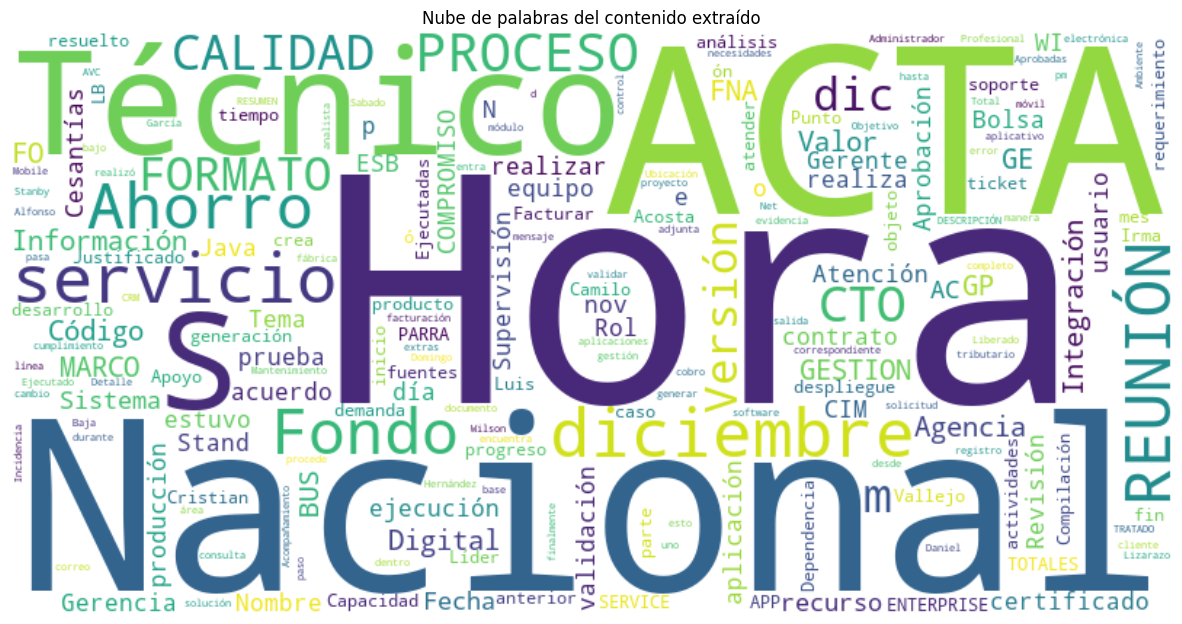

In [32]:
# ==========================================================
# 6. Generación de la Nube de Palabras (Opcional)
# ==========================================================

# Unir todos los textos extraídos para generar una nube de palabras
all_text = " ".join(df['text'].tolist())

wordcloud = WordCloud(
    width=800,
    height=400, 
    stopwords=spanish_stopwords,  # Aquí puedes seguir usando el set si lo deseas para la nube
    background_color='white',
    collocations=False
).generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras del contenido extraído")
plt.show()